<a href="https://colab.research.google.com/github/anisaasaluka/TugasUTS-UAS/blob/anisa/04_analisis_eksploratif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pulp as pl
import pandas as pd
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, value

In [10]:
def solve_scenario(kain, jam_mesin, jam_tk, demand_H, demand_T,
                   profit_H=80000, profit_T=50000):

    model = LpProblem("Produksi_WearEase", LpMaximize)

    x1 = LpVariable("Hoodie", lowBound=0)
    x2 = LpVariable("Tshirt", lowBound=0)

    # Objective function
    model += profit_H * x1 + profit_T * x2

    # Constraints
    model += 3*x1 + 1.5*x2 <= kain       # Kain
    model += 1.5*x1 + 0.5*x2 <= jam_mesin # Jam mesin
    model += 2*x1 + x2 <= jam_tk         # Jam tenaga kerja
    model += x1 <= demand_H              # Permintaan hoodie
    model += x2 <= demand_T              # Permintaan t-shirt

    model.solve()

    return {
        "Hoodie": value(x1),
        "Tshirt": value(x2),
        "Total_Profit": value(model.objective)
    }

In [12]:
scenarios = {}

# SKENARIO BASELINE
scenarios["Baseline"] = solve_scenario(
    kain=300,
    jam_mesin=100,
    jam_tk=160,
    demand_H=80,
    demand_T=150
)

# SKENARIO 1 — Tenaga kerja +5 orang (naik ke 200 jam)
scenarios["Tenaga Kerja +5"] = solve_scenario(
    kain=300,
    jam_mesin=100,
    jam_tk=200,
    demand_H=80,
    demand_T=150
)

# SKENARIO 2 — Jam mesin naik dari 10→12 jam (100→120)
scenarios["Jam Mesin 12 jam"] = solve_scenario(
    kain=300,
    jam_mesin=120,
    jam_tk=160,
    demand_H=80,
    demand_T=150
)

# SKENARIO 3 — Demand hoodie naik jadi 100
scenarios["Demand Hoodie 100"] = solve_scenario(
    kain=300,
    jam_mesin=100,
    jam_tk=160,
    demand_H=100,
    demand_T=150
)

# SKENARIO 4 — Profit Tshirt TURUN dari 50.000 → 33.000
scenarios["Profit Tshirt turun"] = solve_scenario(
    kain=300,
    jam_mesin=100,
    jam_tk=160,
    demand_H=80,
    demand_T=150,
    profit_H=80000,
    profit_T=33000
)

In [13]:
df = pd.DataFrame(scenarios).T
df

,Hoodie,Tshirt,Total_Profit
Baseline,5.000000,150.0,7900000.00
Tenaga Kerja +5,16.666667,150.0,8833333.36
Jam Mesin 12 jam,5.000000,150.0,7900000.00
Demand Hoodie 100,5.000000,150.0,7900000.00
Profit Tshirt turun,40.000000,80.0,5840000.00


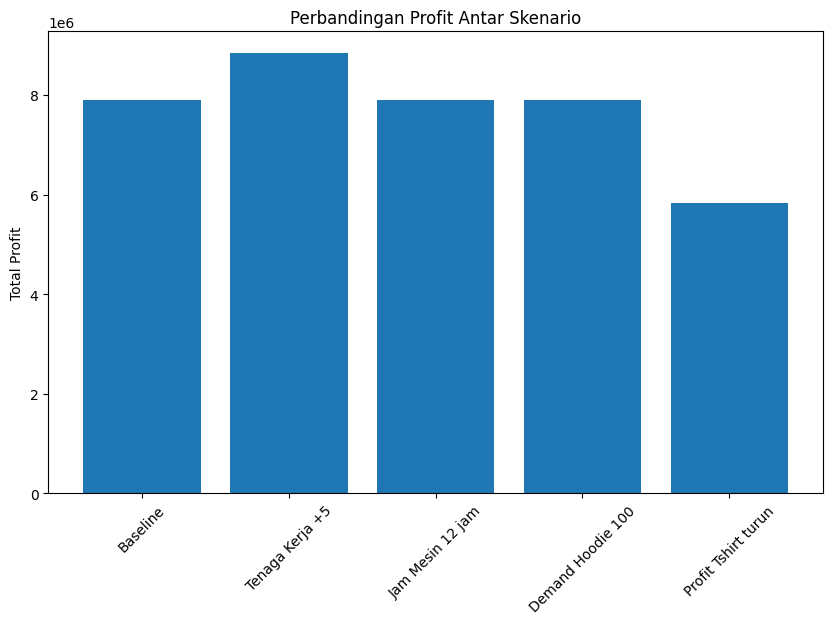

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df.index, df["Total_Profit"])
plt.xticks(rotation=45)
plt.ylabel("Total Profit")
plt.title("Perbandingan Profit Antar Skenario")
plt.show()

In [19]:
df.to_csv("analisi eksploratif.csv")
df

,Hoodie,Tshirt,Total_Profit
Baseline,5.000000,150.0,7900000.00
Tenaga Kerja +5,16.666667,150.0,8833333.36
Jam Mesin 12 jam,5.000000,150.0,7900000.00
Demand Hoodie 100,5.000000,150.0,7900000.00
Profit Tshirt turun,40.000000,80.0,5840000.00
